In [66]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import utils_code.preprocessing_and_utilities as pput
import utils_code.park_visits_change_rate as pvcr

In [68]:
# inline plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use("seaborn")

# autoreload settings (for modules)
%load_ext autoreload
%autoreload 2

# turn off certain warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read the processed data

In [5]:
# read the cbg_connections data
cbg_connections = pd.read_csv("../data/cbg_connections_processed.csv", parse_dates=['date'],
                              dtype={'visitor_home_cbg': str, 'GEOID_origin': str, 'GEOID_dest': str,
                                     'visitor_home_county': str, 'visitor_dest_county': str})

In [6]:
cbg_connections_local = cbg_connections[cbg_connections['visitor_home_county'].isin(['36005','36047','36061','36081','36085'])]

In [12]:
# compress the big data file
cbg_connections.to_parquet("data/cbg_connections_processed.parquet.gzip", compression='gzip')

## Fraction of visits to each type of park

## All Visits

### Monthly Fraction by Park Type

In [7]:
cbg_connections_data = cbg_connections.copy()
time_unit = 'month'
id_cols = ['safegraph_place_id', 'park_name', 'park_type', 'date', 'year', 'month', 'poi_cbg', 'raw_visit_counts']
v_col = 'raw_visit_counts'

park_visits, park_visits_total = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=None)

In [11]:
park_visits.to_csv("../data/park_visits/park_visits.csv", index=False)
park_visits_total.to_csv("../data/park_visits/park_visits_total_monthly.csv", index=False)

### Annual Fraction by Park Type

In [9]:
time_unit = 'year'

park_visits_total, park_visits_annual_fraction_2020 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2020)
park_visits_total, park_visits_annual_fraction_2019 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2019)

In [10]:
park_visits_annual_fraction_2020

,year,park_type,raw_visit_counts,raw_visit_counts_annual_total,fraction_to_annual_total,fraction_cumsum
0,2020,Neighborhood Park,2118963,10279798,20.612886,20.612886
1,2020,Community Park,1786854,10279798,17.382190,37.995075
2,2020,Jointly Operated Playground,1411035,10279798,13.726291,51.721367
3,2020,Flagship Park,1380409,10279798,13.428367,65.149733
4,2020,Playground,1375563,10279798,13.381226,78.530959
5,2020,Nature Area,535313,10279798,5.207427,83.738387
6,2020,Recreation Field/Courts,469251,10279798,4.564788,88.303175
7,2020,Triangle/Plaza,398149,10279798,3.873121,92.176296
8,2020,Buildings/Institutions,294700,10279798,2.866788,95.043084
9,2020,Garden,154991,10279798,1.507724,96.550808


## All Visitors

### Monthly Fraction by Park Type

In [12]:
cbg_connections_data = cbg_connections.copy()
time_unit = 'month'
id_cols = ['safegraph_place_id', 'park_name', 'park_type', 'date', 'year', 'month', 'poi_cbg', 'raw_visitor_counts']
v_col = 'raw_visitor_counts'

park_visitors, park_visitors_total = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=None)

In [13]:
park_visitors.to_csv("../data/park_visits/park_visitors.csv", index=False)
park_visitors_total.to_csv("../data/park_visits/park_visitors_total_monthly.csv", index=False)

### Annual Fraction by Park Type

In [14]:
time_unit = 'year'

park_visitors_total, park_visitors_annual_fraction_2020 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2020)
park_visitors_total, park_visitors_annual_fraction_2019 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2019)

## All US Visitors

### Monthly fraction by park type

In [16]:
cbg_connections_data = cbg_connections.copy()
time_unit = 'month'
id_cols = ['safegraph_place_id', 'park_name', 'park_type', 'date', 'year', 'month', 'poi_cbg', 'visitor_home_cbg', 'visitor_count']
v_col = 'visitor_count'

park_us_visitors, park_us_visitors_total = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=None)

In [17]:
park_us_visitors.to_csv("../data/park_visits/park_us_visitors.csv", index=False)
park_us_visitors_total.to_csv("../data/park_visits/park_us_visitors_total_monthly.csv", index=False)

### Annual fraction by park type

In [19]:
time_unit = 'year'

park_us_visitors_total, park_us_visitors_annual_fraction_2020 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2020)
park_us_visitors_total, park_us_visitors_annual_fraction_2019 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2019)

## NYC Local Visitors

### Monthly fraction by park type

In [22]:
cbg_connections_data = cbg_connections_local.copy()
time_unit = 'month'
id_cols = ['safegraph_place_id', 'park_name', 'park_type', 'date', 'year', 'month', 'poi_cbg', 'visitor_home_cbg', 'visitor_count']
v_col = 'visitor_count'

park_local_visitors, park_local_visitors_total = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=None)

In [23]:
park_local_visitors.to_csv("../data/park_visits/park_local_visitors.csv", index=False)
park_local_visitors_total.to_csv("../data/park_visits/park_local_visitors_total_monthly.csv", index=False)

### Annual fraction by park type

In [24]:
time_unit = 'year'

park_local_visitors_total, park_local_visitors_annual_fraction_2020 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2020)
park_local_visitors_total, park_local_visitors_annual_fraction_2019 = pput.park_visits_fraction(cbg_connections_data, time_unit, id_cols, v_col, year=2019)

## Comparison of visitors from different origins

In [33]:
# merge the 2019 and 2020 data
park_visitors_comparison = pd.merge(park_visitors_annual_fraction_2019, park_visitors_annual_fraction_2020, on='park_type', suffixes=['_2019','_2020'])
park_us_visitors_comparison = pd.merge(park_us_visitors_annual_fraction_2019, park_us_visitors_annual_fraction_2020, on='park_type', suffixes=['_2019','_2020'])
park_local_visitors_comparison = pd.merge(park_local_visitors_annual_fraction_2019, park_local_visitors_annual_fraction_2020, on='park_type', suffixes=['_2019','_2020'])

# select the relavant columns
park_visitors_comparison = park_visitors_comparison[['park_type','raw_visitor_counts_2019','raw_visitor_counts_2020']]
park_us_visitors_comparison = park_us_visitors_comparison[['park_type','visitor_count_2019','visitor_count_2020']]
park_local_visitors_comparison = park_local_visitors_comparison[['park_type','visitor_count_2019','visitor_count_2020']]

# merge all types of visitors together
park_visitors_all_vs_local = pd.merge(park_local_visitors_comparison, park_us_visitors_comparison, on='park_type', suffixes=['_local','_us'])
park_visitors_all_vs_local = pd.merge(park_visitors_all_vs_local, park_visitors_comparison, on='park_type', suffixes=['','_all'])

# calculate the fraction of local visitors to us visitors and to all visitors
park_visitors_all_vs_local['local_to_us_fraction_2019'] = (park_visitors_all_vs_local['visitor_count_2019_local'] / park_visitors_all_vs_local['visitor_count_2019_us'] * 100).round(2)
park_visitors_all_vs_local['local_to_us_fraction_2020'] = (park_visitors_all_vs_local['visitor_count_2020_local'] / park_visitors_all_vs_local['visitor_count_2020_us'] * 100).round(2)

# calculate the fraction of local visitors to all visitors
park_visitors_all_vs_local['local_to_all_fraction_2019'] = (park_visitors_all_vs_local['visitor_count_2019_local'] / park_visitors_all_vs_local['raw_visitor_counts_2019'] * 100).round(2)
park_visitors_all_vs_local['local_to_all_fraction_2020'] = (park_visitors_all_vs_local['visitor_count_2020_local'] / park_visitors_all_vs_local['raw_visitor_counts_2020'] * 100).round(2)

In [34]:
park_visitors_all_vs_local

,park_type,visitor_count_2019_local,visitor_count_2020_local,visitor_count_2019_us,visitor_count_2020_us,raw_visitor_counts_2019,raw_visitor_counts_2020,local_to_us_fraction_2019,local_to_us_fraction_2020,local_to_all_fraction_2019,local_to_all_fraction_2020
0,Neighborhood Park,1302203,593175,1716881,727438,2513057,1071939,75.85,81.54,51.82,55.34
1,Community Park,1009907,554014,1291056,643666,1708520,888053,78.22,86.07,59.11,62.39
2,Flagship Park,842038,381410,1336529,500057,1732384,673322,63.00,76.27,48.61,56.65
3,Jointly Operated Playground,763718,374947,875623,440377,1227608,638408,87.22,85.14,62.21,58.73
4,Playground,663992,365820,805454,455150,1153740,699710,82.44,80.37,57.55,52.28
5,Triangle/Plaza,391581,132099,574661,178209,831113,248510,68.14,74.13,47.12,53.16
6,Buildings/Institutions,247365,74212,400081,109427,574440,168113,61.83,67.82,43.06,44.14
7,Recreation Field/Courts,218660,134515,260763,156466,352750,215054,83.85,85.97,61.99,62.55
8,Nature Area,147566,148904,179116,181178,228543,241645,82.39,82.19,64.57,61.62
9,Garden,89818,45677,101930,51761,130657,71237,88.12,88.25,68.74,64.12


## NYC Parks Overview

In [55]:
# read the nyc park informaition (processed from ArcGIS Pro)
nyc_parks_info = pd.read_csv('../data/nyc_parks_major_dissolve.csv')
nyc_parks_info.rename(columns={'landuse':'park_type', 'Shape_Length':'perimeter', 'Shape_Area':'area'}, inplace=True)

In [56]:
nyc_parks_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   park_type   1272 non-null   object 
 1   park_name   1272 non-null   object 
 2   parknum     1271 non-null   object 
 3   perimeter   1272 non-null   float64
 4   area        1272 non-null   float64
 5   CENTROID_X  1272 non-null   float64
 6   CENTROID_Y  1272 non-null   float64
dtypes: float64(4), object(3)
memory usage: 69.7+ KB


### Overview Map

In [ ]:
# the major park types that attracted more than 90% of the total visits
major_park_types = ['Community Park', 'Flagship Park', 'Jointly Operated Playground', 'Nature Area',
                    'Neighborhood Park', 'Playground', 'Recreation Field/Courts', 'Triangle/Plaza']

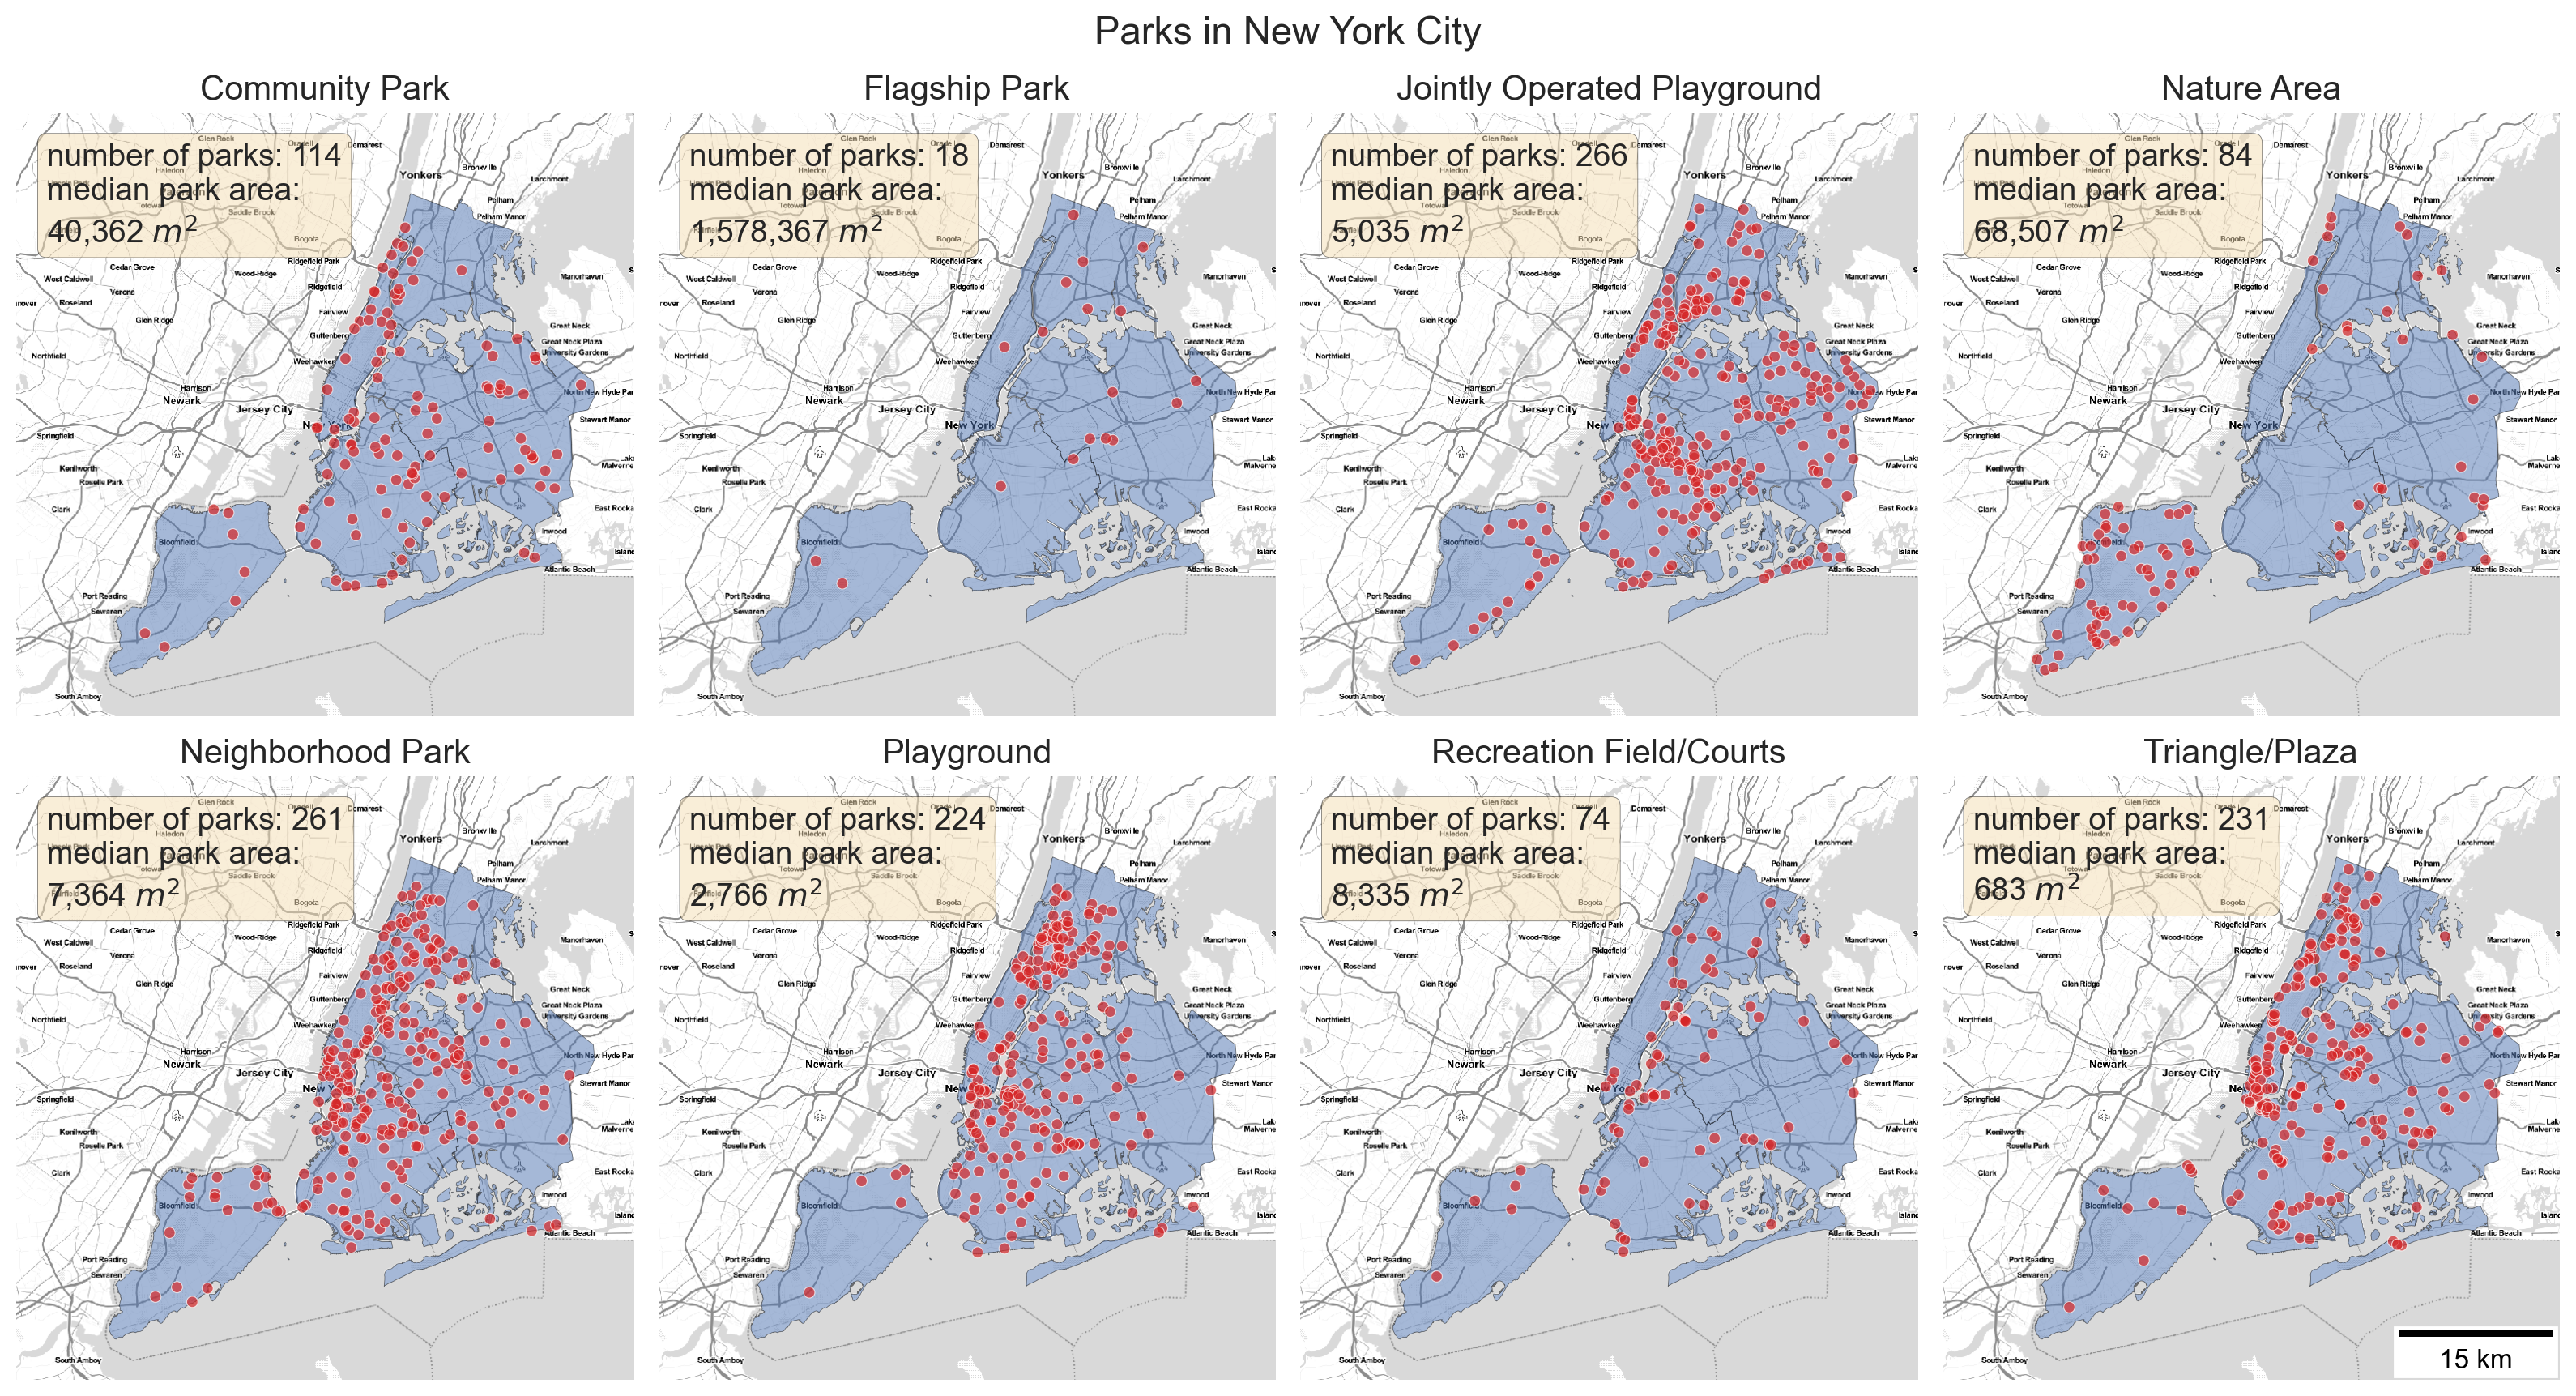

In [10]:
data = nyc_parks_info
x_col = 'CENTROID_X'
y_col = 'CENTROID_Y'
park_types = major_park_types
title = 'Parks in New York City'

pput.map_park_by_type(data, x_col, y_col, park_types, title)

### Park characteristics (income and area)

In [57]:
# income of the parks' neighborhoods (processed from ArcGIS Pro)
nyc_parks_nbhd_income = pd.read_csv("../data/income/nyc_parks_nbhd_income.csv")

In [58]:
# combine income and area information
nyc_parks_nbhd_income = pd.merge(nyc_parks_nbhd_income, nyc_parks_info, on=['parknum'], how='left')
nyc_parks_income_area = nyc_parks_nbhd_income.groupby(['park_type','park_name','parknum'])[['per_capita_income','area']].mean().reset_index()

In [64]:
# generate tukey's hsd test result labels
res_df_income, group_letters_income = pvcr.tukeyhsd_test(nyc_parks_income_area, 'per_capita_income', 'park_type')
res_df_area, group_letters_area = pvcr.tukeyhsd_test(nyc_parks_income_area, 'area', 'park_type')

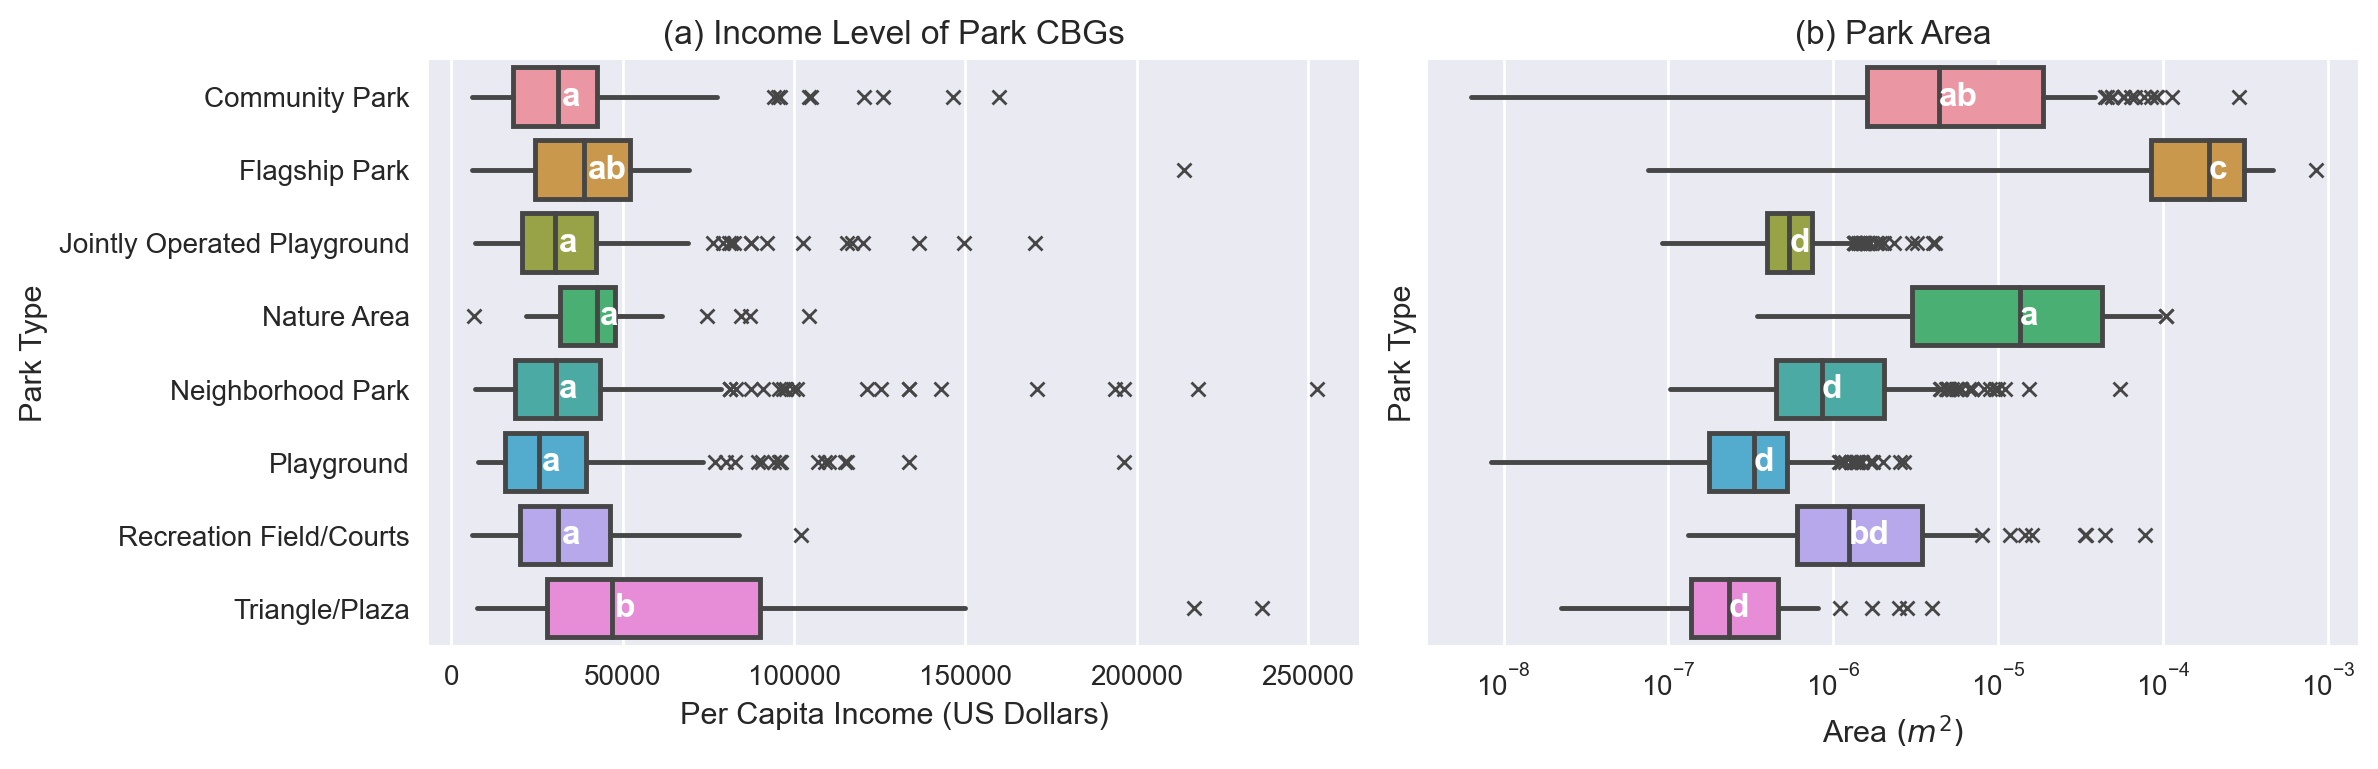

In [65]:
# generate boxplots of park characteristics
fig, axes = plt.subplots(figsize=(12,4), ncols=2, sharey=True)

sns.boxplot(data=nyc_parks_income_area, x='per_capita_income', y='park_type', ax=axes[0],
            showcaps=False, flierprops={"marker": "x"})
sns.boxplot(data=nyc_parks_income_area, x='area', y='park_type', ax=axes[1],
            showcaps=False, flierprops={"marker": "x"})

# add group labels
text_xs = nyc_parks_income_area.groupby(['park_type'])['per_capita_income'].median()
text_ys = axes[0].get_yticks()
for x,y,label in zip(text_xs, text_ys, group_letters_income['label']):
    axes[0].text(x+1000, y, label,
                 verticalalignment='center', size=12,
                 color='w', weight='semibold')

axes[0].set_title(r"(a) Income Level of Park CBGs")
axes[0].set_xlabel('Per Capita Income (US Dollars)')
axes[0].set_ylabel('Park Type')

# add group labels
text_xs = nyc_parks_income_area.groupby(['park_type'])['area'].median()
text_ys = axes[1].get_yticks()
for x,y,label in zip(text_xs, text_ys, group_letters_area['label']):
    axes[1].text(x, y, label,
                 verticalalignment='center', size=12,
                 color='w', weight='semibold')


axes[1].set_title('(b) Park Area')
axes[1].set_xscale('log')
axes[1].set_xlabel('Area $(m^2)$')
axes[1].set_ylabel('Park Type')

plt.tight_layout();